In [44]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [45]:
global_temp  = pd.read_csv("C:/Users/oyj57/Downloads/archive/GlobalTemperatures.csv")
global_temp .head(20)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
global_temp['dt'][0].split('-')[0] #연도 전처리

'1750'

In [47]:
def fetch_year(date):
    return date.split('-')[0]

In [48]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [49]:
#연도별로 데이터를 그룹화
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [50]:
data['Uncertainity_top']= data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty'] #평균온도의 상한선(= 평균 온도의 최댓값)
data['Uncertainity_bottom']= data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [51]:
fig = px.line(data,x='years',y=['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom'],title='세계 육지 평균 온도')
fig.show()

In [76]:
data['years'] = data['years'].astype(int)
filtered_data = data[(data['years'] >= 1838) & (data['years'] <= 2015)]

# 세계 육지 평균 온도 그래프 그리기
fig = px.line(filtered_data, x='years', y=['LandAverageTemperature', 'Uncertainity_top', 'Uncertainity_bottom'], title='세계 육지 평균 온도')

# x축 범위 설정
fig.update_xaxes(range=[1838, 2015])

fig.show()

In [52]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [53]:
global_temp['month']=global_temp['dt'].dt.month

In [54]:
def get_season(month): #사계절로 분류
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'
    
global_temp['season']=global_temp['month'].apply(get_season)

In [55]:
years=global_temp['years'].unique()

In [56]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []
for year in years:
    current_df=global_temp[global_temp['years'] == year]
    spring_temp.append(current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean())
    

In [57]:
season = pd.DataFrame()

In [58]:
season['year'] = years
season['spring_temp'] = spring_temp
season['summer_temp'] = summer_temp
season['autumn_temp'] = autumn_temp
season['winter_temp'] = winter_temp

In [59]:
fig=px.line(season,x='year',y=['spring_temp','summer_temp','autumn_temp','winter_temp'],title='사계절 별 평균 온도')
fig.show()

In [60]:
temp_by_country = pd.read_csv("C:/Users/oyj57/Downloads/archive/GlobalLandTemperaturesByCountry.csv")
temp_by_country = temp_by_country.dropna(how='any' ,axis=0)


In [61]:
temp_by_country['years']=temp_by_country['dt'].apply(fetch_year)

In [62]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [63]:
temp_Brazil=temp_by_country.loc[(temp_by_country.Country == 'Brazil')]
temp_Brazil['dt'] = pd.to_datetime(temp_Brazil['dt'])
temp_Brazil.set_index('dt',inplace = True)
temp_Brazil['AverageTemperature'].mean()

24.699255545286466

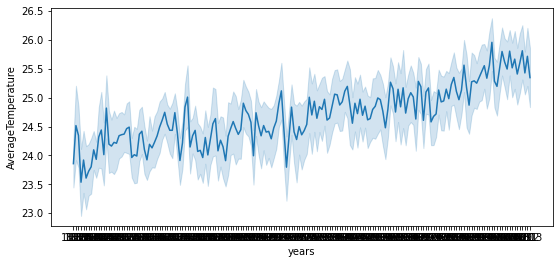

In [64]:
plt.figure(figsize=(9,4))
sns.lineplot(x = "years" , y = "AverageTemperature",data=temp_Brazil)
plt.show()

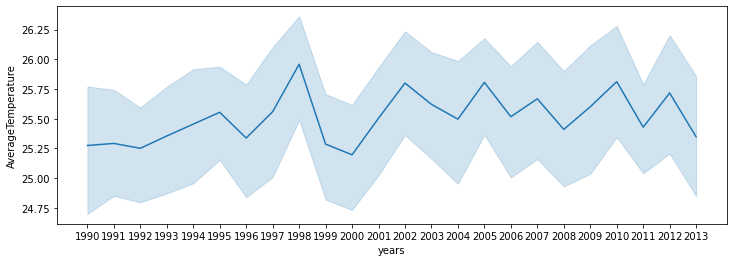

In [65]:
temp_Brazil_latest=temp_Brazil.loc['1990':'2013']
plt.figure(figsize=(12,4))
sns.lineplot(x = "years" , y = "AverageTemperature",data=temp_Brazil_latest)
plt.show()

In [66]:
train = temp_Brazil[:2000].copy()
val = temp_Brazil[2000:2700].copy()
test = temp_Brazil[2700:].copy()
baseline = val['AverageTemperature'].shift()
baseline.dropna(inplace=True)

In [67]:
from sklearn.metrics import mean_squared_error
import math
def measure_rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)

In [68]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(temp_Brazil['AverageTemperature'])

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

In [70]:
df=temp_Brazil.copy()
df['First_temp_diff']=df['AverageTemperature']-df['AverageTemperature'].shift(24)
adfuller_test(df['First_temp_diff'].dropna())  #adf 시게열 안정성 분석

#유의수준 5% 미만이므로 대립가설 채택
#시계열 데이터는 정상성을 가지며, unir root가 존재하지 않는다. 데이터에는 추세나 계절성과 같은 비정상성 요소가 없다.

ADF Test Statistic : -13.410653904660197
p-value : 4.380618864007979e-25
#Lags Used : 25
Number of Observations Used : 2114


AverageTemperature                0
AverageTemperatureUncertainty     0
Country                           0
years                             0
First_temp_diff                  24
dtype: int64

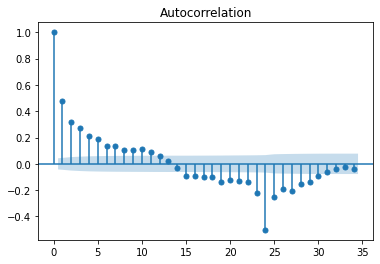

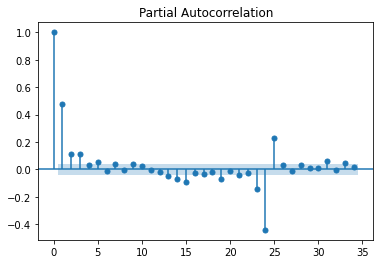

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['First_temp_diff'].dropna())

plot_pacf(df['First_temp_diff'].dropna())

df.isna().sum()

In [72]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Brazil Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(math.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -3.3508
p-value                           0.0128
Lags Used                        26.0000
Number of Observations Used    1973.0000
Critical Value (1%)              -3.4337
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5676
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


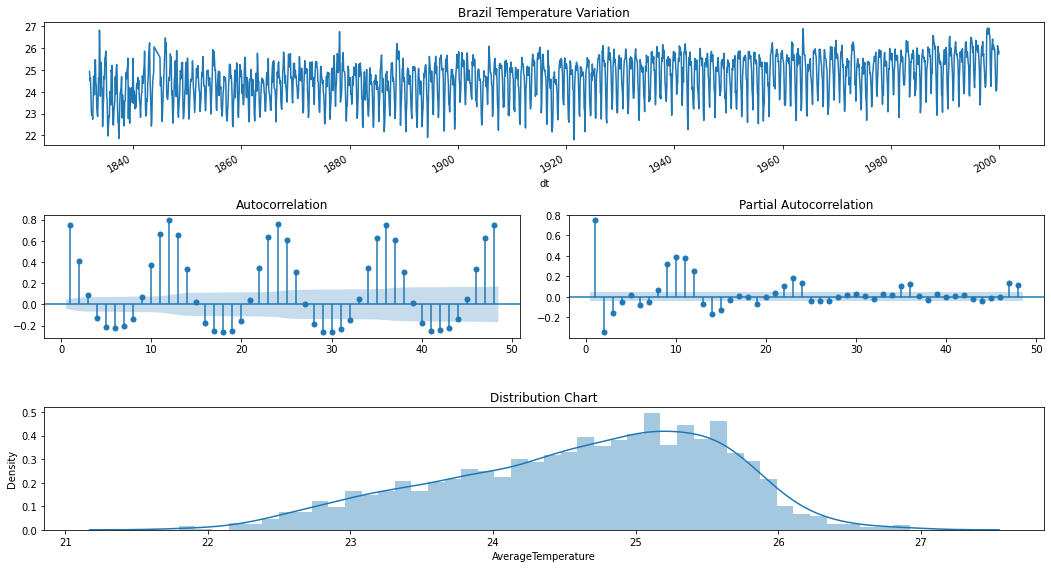

In [73]:
check_stationarity(train['AverageTemperature'])

Results of Dickey-Fuller Test:
Test Statistic                  -13.0317
p-value                           0.0000
Lags Used                        24.0000
Number of Observations Used    1963.0000
Critical Value (1%)              -3.4337
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5676
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


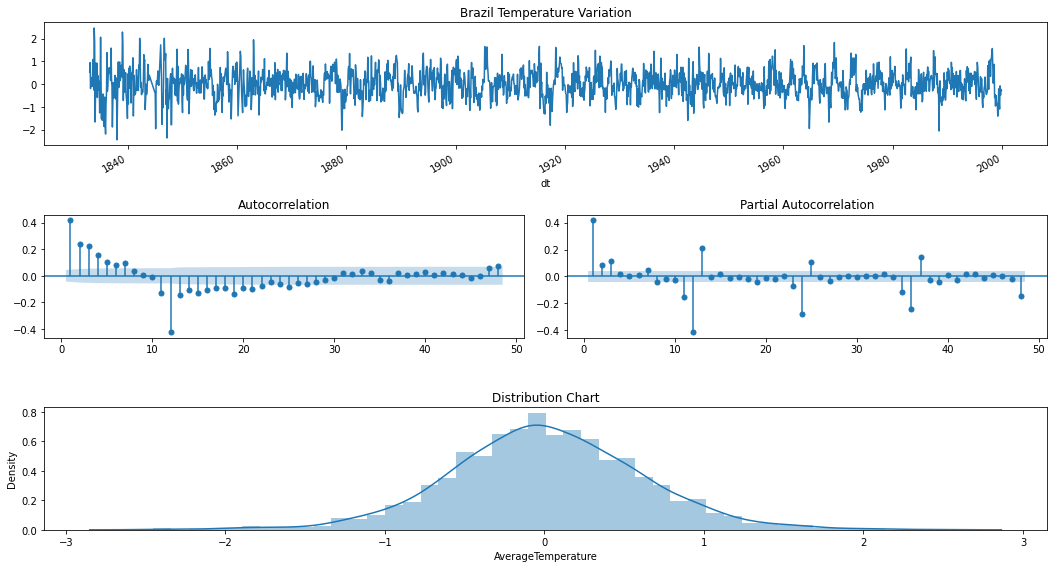

In [74]:
check_stationarity(train['AverageTemperature'].diff(12).dropna())

In [80]:
#브라질 강수량 데이터 
rain = pd.read_csv("C:/Users/oyj57/Downloads/archive/brazilprecipitation.csv")
rain.head(20)

,state,date,precipitation
0,BA,31/01/1998,63.6
1,BA,28/02/1998,55.6
2,BA,31/03/1998,117.2
3,BA,30/04/1998,206.0
4,BA,31/05/1998,250.9
5,BA,30/06/1998,358.3
6,BA,31/07/1998,306.5
7,BA,31/08/1998,155.4
8,BA,30/09/1998,63.9
9,BA,31/10/1998,111.8


In [85]:
precipitation = rain[rain['state'].isin(['MG', 'SP', 'ES','PR'])] # 주 중 브라질 커피에 영향을 미치는 변수만 생성

In [86]:
sigla_estado = {
    "ES" : "Espírito Santo",
    "MG" : "Minas Gerais",
    "PR" : "Paraná",
    "SP" : "São Paulo",
}

In [87]:
# 데이터 전처리
precipitation['date'] =  pd.to_datetime(precipitation['date'], format='%d/%m/%Y')

precipitation['date'] = precipitation['date'] + pd.Timedelta(days=1)

precipitation['estado'] = precipitation['state'].replace(sigla_estado)

# There isn't data precipitacion in Rondonia
precipitation['estado'].value_counts()

Minas Gerais      239
São Paulo         239
Paraná            231
Espírito Santo    230
Name: estado, dtype: int64

In [88]:
precipitation['month'] =  precipitation['date'].dt.month
precipitation['year'] =  precipitation['date'].dt.year
precipitation.head()

,state,date,precipitation,estado,month,year
1638,MG,1998-02-01,339.6,Minas Gerais,2,1998
1639,MG,1998-03-01,226.3,Minas Gerais,3,1998
1640,MG,1998-04-01,68.7,Minas Gerais,4,1998
1641,MG,1998-05-01,37.2,Minas Gerais,5,1998
1642,MG,1998-06-01,78.2,Minas Gerais,6,1998


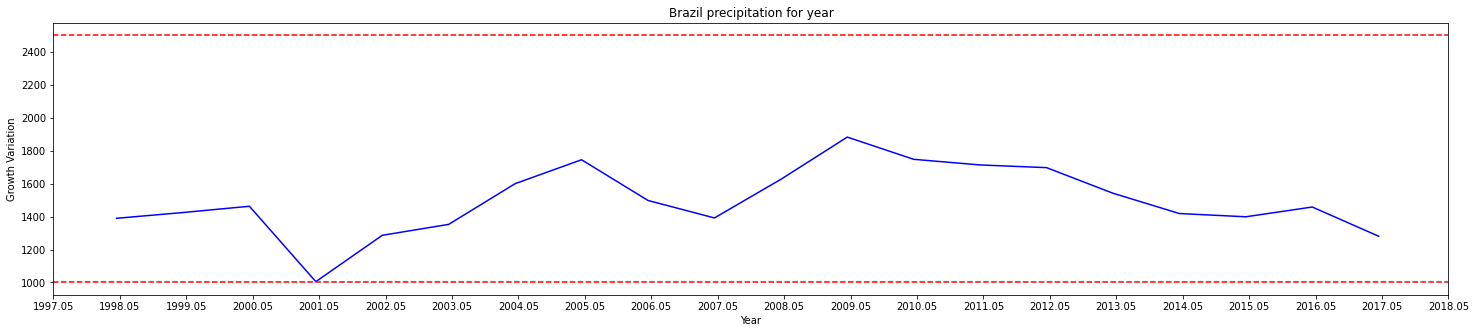

In [93]:
precipitation_grafico = (precipitation.groupby('year')['precipitation'].sum())/4 # 4개의 주 평균 강수량
ax = plt.gca()
precipitation_grafico.plot(kind='line',x='date',y='precipitation',ax=ax, figsize=(25, 5), color='b')
ax.set_title("Brazil precipitation for year")
ax.set_ylabel('Growth Variation')
ax.set_xlabel('Year')
ax.locator_params(integer=True)
start, end = ax.get_xlim()
ax.axhline(y=1000, color='r', linestyle='--', label='y=1000') # 커피 재배 적정 강수량 연간 1000~2500mm 
ax.axhline(y=2500, color='r', linestyle='--', label='y=2500')
ax.xaxis.set_ticks(np.arange(start, end+1, 1))

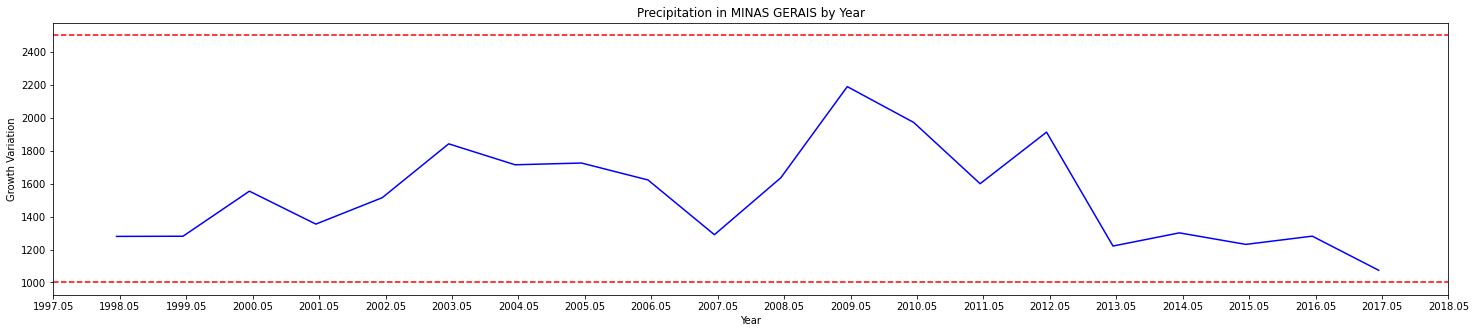

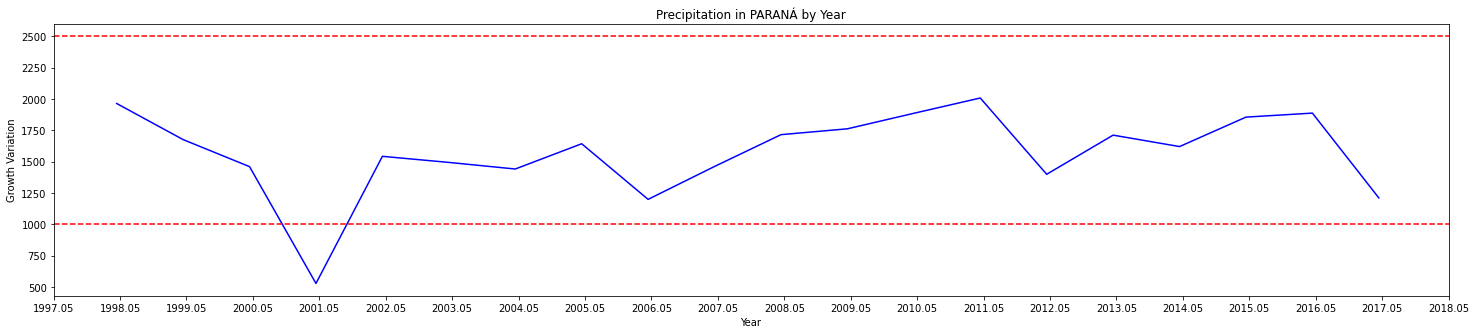

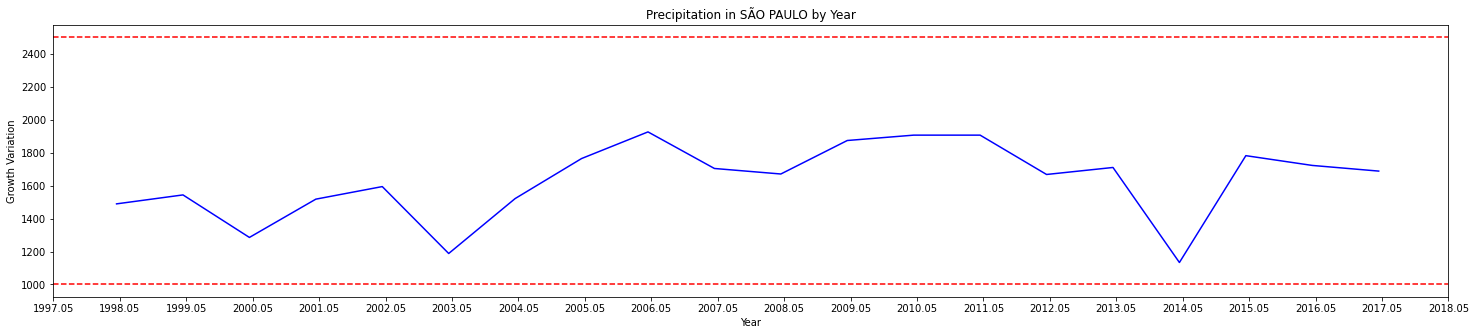

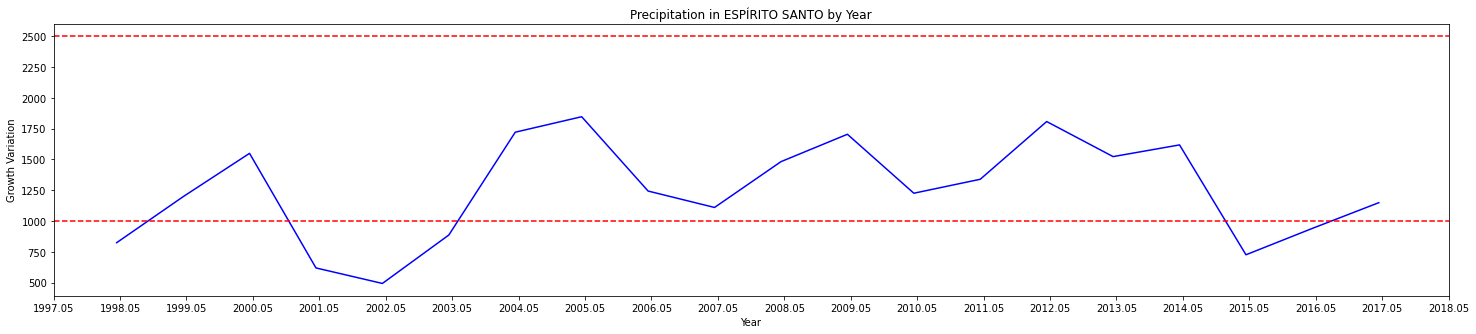

In [100]:
all_states = precipitation['estado'].unique()

# 모든 주에 대한 그래프 생성
for estado in all_states:
    state_data = precipitation[precipitation['estado'] == estado]
    precipitation_grafico = (state_data.groupby('year')['precipitation'].sum()) # 4개의 주 평균 강수량
    ax = plt.gca()
    precipitation_grafico.plot(kind='line', x='year', y='precipitation', ax=ax, figsize=(25, 5), color='b')
    ax.set_title(f"Precipitation in {estado.upper()} by Year")
    ax.set_ylabel('Growth Variation')
    ax.set_xlabel('Year')
    ax.locator_params(integer=True)
    start, end = ax.get_xlim()
    ax.axhline(y=1000, color='r', linestyle='--', label='y=1000')  # 커피 재배 적정 강수량 연간 1000~2500mm
    ax.axhline(y=2500, color='r', linestyle='--', label='y=2500')
    ax.xaxis.set_ticks(np.arange(start, end + 1, 1))
    plt.show()

In [4]:
import pandas as pd
df  = pd.read_csv("C:/Users/oyj57/Downloads/archive/상파울루강수량.csv")

In [5]:
df

,Date,Precipitation
0,1984-01-31,259.3
1,1984-02-29,32.5
2,1984-03-31,54.0
3,1984-04-30,96.8
4,1984-05-31,113.0
...,...,...
452,2021-09-30,39.5
453,2021-10-31,91.9
454,2021-11-30,98.6
455,2021-12-31,127.3


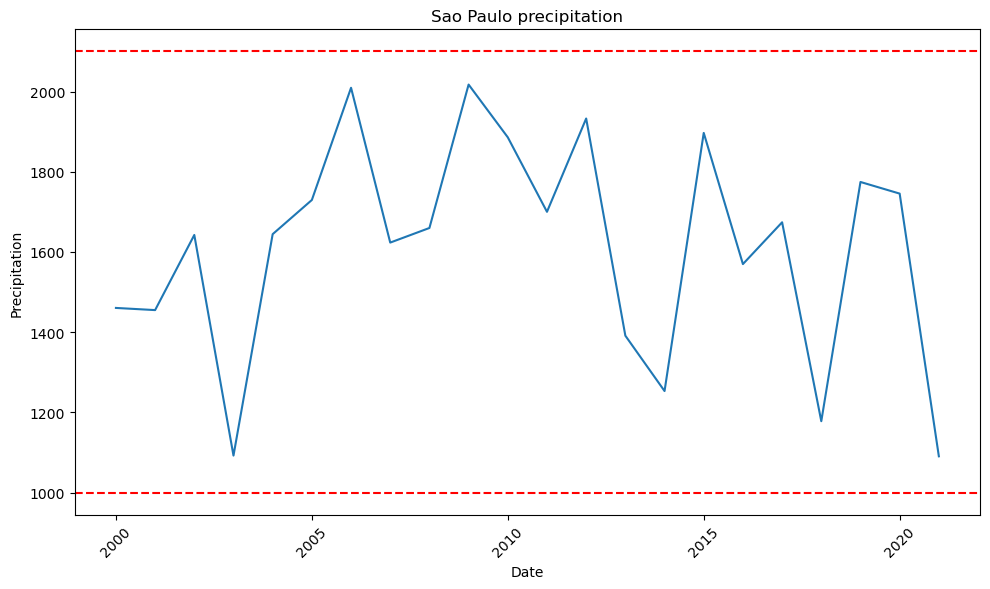

In [22]:
import matplotlib.pyplot as plt

df_2000s = df[df['Date'].dt.year >= 2000]
df_2000s = df_2000s[df_2000s['Date'].dt.year <= 2021]
df_2000s['Date'] = pd.to_datetime(df_2000s['Date'])
df_2000s['Year'] = df_2000s['Date'].dt.year
annual_precipitation = df_2000s.groupby('Year')['Precipitation'].sum().reset_index()
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
ax = plt.gca()
plt.plot(annual_precipitation['Year'], annual_precipitation['Precipitation'], linestyle='-')  # 선 그래프 설정
ax.axhline(y=1000, color='r', linestyle='--', label='y=1000')  # 커피 재배 적정 강수량 연간 1000~2500mm
ax.axhline(y=2100, color='r', linestyle='--', label='y=2500')
plt.title('Sao Paulo precipitation')  # 그래프 제목 설정
plt.xlabel('Date')  # x축 레이블 설정
plt.ylabel('Precipitation')  # y축 레이블 설정

plt.xticks(rotation=45)  # x축 눈금 라벨 회전

plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()  # 그래프 표시
